# Ejemplo de aplicación de KMeans clustering

Disponemos de un dataset con información de ingresos, gastos y algunas características de nuestros clientes. Queremos hacer una segmentación para entender cómo son nuestros clientes, cómo compran y poder ajustar nuestras ofertas.

_Ejemplo basado en: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python_

In [1]:
#import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  


In [2]:
#Import the dataset

dataset = pd.read_csv('Mall_Customers.csv')

dataset.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [4]:
dataset.info() # no existen valores nulos y todas las columnas tienen 200 valores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Consideramos únicamente dos features (Annual income and Spending Score)
X= dataset.iloc[:, [3,4]].values


In [7]:
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod

# kmeans++ https://es.wikipedia.org/wiki/K-means%2B%2B
# http://theory.stanford.edu/~sergei/slides/BATS-Means.pdf


from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

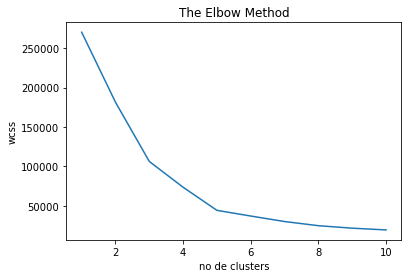

In [8]:
# Visualizamos los resultados del método ELBOW method para conseguir el valor óptimo de K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no de clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
## k=5

## https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)



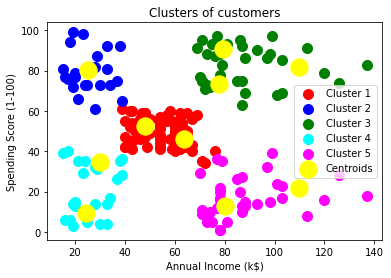

In [10]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [11]:
###Interpretación

# Clúster 1 (color azul) -> gana mucho dinero pero gasta poco
#cluster 2 (rojo Colr) -> compensado en términos de ingresos y gastos
#cluster 3 (color verde) -> gana mucho y también gasta mucho [OBJETIVO]
#cluster 4 (color magenta) -> gana menos pero gasta más
#Cluster 5 (color cian) -> Gana menos, gasta menos

###### Podemos poner el Cluster 3 en algún sistema de alerta donde se les pueda enviar un correo electrónico a diario con ofertas
# ya que parece que es el segmento que mejor convierte, en los otros habrá que estudiar mejor las ofertas.


# Clustering jerárquico
## Agglomerative methods

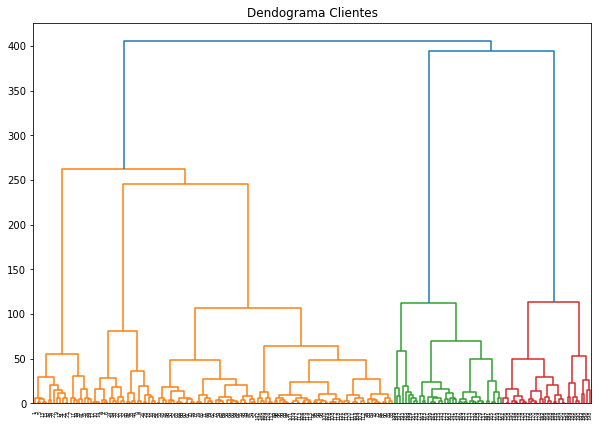

In [12]:
import scipy.cluster.hierarchy as shc

data = dataset.iloc[:, 3:5].values

plt.figure(figsize=(10, 7))
plt.title("Dendograma Clientes")
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

cluster2 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster2.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 5, 0, 5, 0,
       1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 2, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

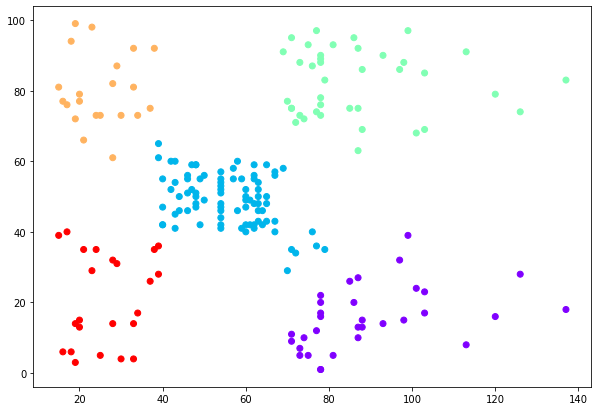

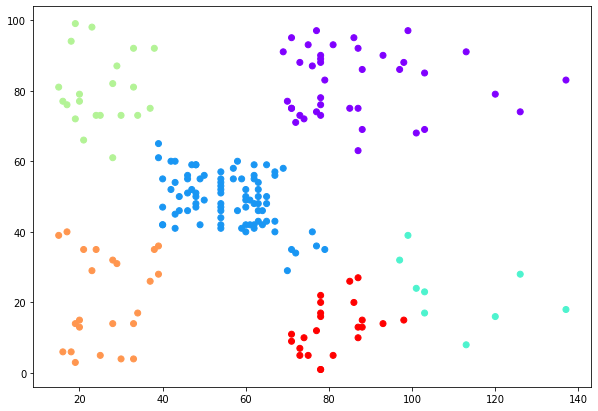

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster2.labels_, cmap='rainbow')